In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import tensorflow as tf
from sklearn.metrics import f1_score
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Flatten, MaxPooling2D, Dropout, Conv2D

In [ ]:
!unzip -q /content/Numberplate_dataset.zip -d /content/Numberplate_dataset

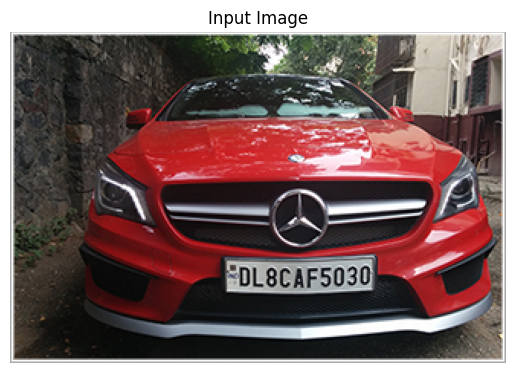

In [ ]:
import matplotlib.pyplot as plt
import cv2

# Read image
img = cv2.imread("/content/Numberplate_dataset/car.jpg")  # Update the correct path

if img is not None:
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for correct colors
    plt.imshow(img_rgb)
    plt.axis("off")
    plt.title("Input Image")
    plt.show()
else:
    print("❌ Image not found. Check the file path!")


In [ ]:
# Loads the data required for detecting the license plates from cascade classifier.
plate_cascade = cv2.CascadeClassifier("/content/Numberplate_dataset/indian_license_plate.xml")
# add the path to 'india_license_plate.xml' file.

In [ ]:
def detect_plate(img, text=''): # the function detects and perfors blurring on the number plate.
    plate_img = img.copy()
    roi = img.copy()
    plate_rect = plate_cascade.detectMultiScale(plate_img, scaleFactor = 1.2, minNeighbors = 7) # detects numberplates and returns the coordinates and dimensions of detected license plate's contours.
    for (x,y,w,h) in plate_rect:
        roi_ = roi[y:y+h, x:x+w, :] # extracting the Region of Interest of license plate for blurring.
        plate = roi[y:y+h, x:x+w, :]
        cv2.rectangle(plate_img, (x+2,y), (x+w-3, y+h-5), (51,181,155), 3) # finally representing the detected contours by drawing rectangles around the edges.
    if text!='':
        plate_img = cv2.putText(plate_img, text, (x-w//2,y-h//2),
                                cv2.FONT_HERSHEY_COMPLEX_SMALL , 0.5, (51,181,155), 1, cv2.LINE_AA)

    return plate_img, plate # returning the processed image.

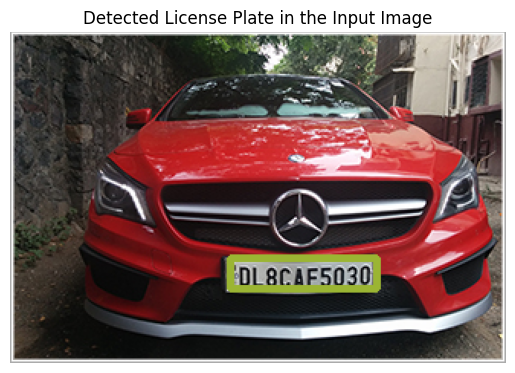

None

'input image'

In [ ]:
# Getting plate prom the processed image
output_img, plate = detect_plate(img)

# Convert processed image to RGB before displaying
output_img_rgb = cv2.cvtColor(output_img, cv2.COLOR_BGR2RGB)

# Display the corrected image
plt.imshow(output_img_rgb)
plt.axis("off")
plt.title("Detected License Plate in the Input Image")
plt.show()

img = cv2.imread('../input/ai-indian-license-plate-recognition-data/car.jpg')
display(img, 'input image')

In [ ]:
display(plate, 'extracted license plate from the image')

array([[[107,  97,  90],
        [102,  87,  84],
        [101,  87,  81],
        ...,
        [ 34,  28,  29],
        [ 50,  44, 163],
        [ 44,  40, 176]],

       [[ 68,  71,  76],
        [ 85,  86,  90],
        [ 86,  85,  87],
        ...,
        [ 35,  28,  31],
        [ 53,  41, 159],
        [ 47,  39, 180]],

       [[160, 167, 164],
        [172, 177, 178],
        [165, 170, 171],
        ...,
        [ 40,  35,  37],
        [ 54,  42, 162],
        [ 43,  38, 177]],

       ...,

       [[104, 102, 101],
        [116, 114, 113],
        [107, 105, 105],
        ...,
        [ 33,  30,  26],
        [ 46,  43,  39],
        [ 55,  52,  48]],

       [[  6,   4,   4],
        [  3,   1,   1],
        [  8,   3,   5],
        ...,
        [ 48,  43,  40],
        [ 31,  28,  24],
        [ 29,  26,  22]],

       [[ 14,  14,  14],
        [ 15,  15,  15],
        [ 19,  17,  16],
        ...,
        [ 38,  33,  30],
        [ 49,  44,  41],
        [ 45,  40,  37]]], dtype=uint8)

'extracted license plate from the image'

In [ ]:
# Match contours to license plate or character template
def find_contours(dimensions, img) :

    # Find all contours in the image
    cntrs, _ = cv2.findContours(img.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    # Retrieve potential dimensions
    lower_width = dimensions[0]
    upper_width = dimensions[1]
    lower_height = dimensions[2]
    upper_height = dimensions[3]

    # Check largest 5 or  15 contours for license plate or character respectively
    cntrs = sorted(cntrs, key=cv2.contourArea, reverse=True)[:15]

    ii = cv2.imread('contour.jpg')

    x_cntr_list = []
    target_contours = []
    img_res = []
    for cntr in cntrs :
        # detects contour in binary image and returns the coordinates of rectangle enclosing it
        intX, intY, intWidth, intHeight = cv2.boundingRect(cntr)

        # checking the dimensions of the contour to filter out the characters by contour's size
        if intWidth > lower_width and intWidth < upper_width and intHeight > lower_height and intHeight < upper_height :
            x_cntr_list.append(intX) #stores the x coordinate of the character's contour, to used later for indexing the contours

            char_copy = np.zeros((44,24))
            # extracting each character using the enclosing rectangle's coordinates.
            char = img[intY:intY+intHeight, intX:intX+intWidth]
            char = cv2.resize(char, (20, 40))

            cv2.rectangle(ii, (intX,intY), (intWidth+intX, intY+intHeight), (50,21,200), 2)
            plt.imshow(ii, cmap='gray')

            # Make result formatted for classification: invert colors
            char = cv2.subtract(255, char)

            # Resize the image to 24x44 with black border
            char_copy[2:42, 2:22] = char
            char_copy[0:2, :] = 0
            char_copy[:, 0:2] = 0
            char_copy[42:44, :] = 0
            char_copy[:, 22:24] = 0

            img_res.append(char_copy) # List that stores the character's binary image (unsorted)

    # Return characters on ascending order with respect to the x-coordinate (most-left character first)

    plt.show()
    # arbitrary function that stores sorted list of character indeces
    indices = sorted(range(len(x_cntr_list)), key=lambda k: x_cntr_list[k])
    img_res_copy = []
    for idx in indices:
        img_res_copy.append(img_res[idx])# stores character images according to their index
    img_res = np.array(img_res_copy)

    return img_res

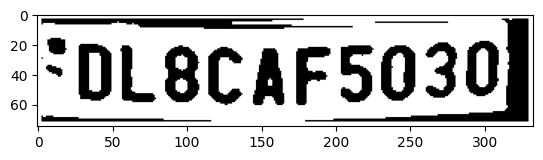

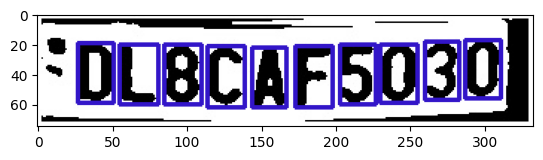

In [ ]:
import numpy as np
# Find characters in the resulting images
def segment_characters(image) :

    # Preprocess cropped license plate image
    img_lp = cv2.resize(image, (333, 75))
    img_gray_lp = cv2.cvtColor(img_lp, cv2.COLOR_BGR2GRAY)
    _, img_binary_lp = cv2.threshold(img_gray_lp, 200, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    img_binary_lp = cv2.erode(img_binary_lp, (3,3))
    img_binary_lp = cv2.dilate(img_binary_lp, (3,3))

    LP_WIDTH = img_binary_lp.shape[0]
    LP_HEIGHT = img_binary_lp.shape[1]

    # Make borders white
    img_binary_lp[0:3,:] = 255
    img_binary_lp[:,0:3] = 255
    img_binary_lp[72:75,:] = 255
    img_binary_lp[:,330:333] = 255

    # Estimations of character contours sizes of cropped license plates
    dimensions = [LP_WIDTH/6,
                       LP_WIDTH/2,
                       LP_HEIGHT/10,
                       2*LP_HEIGHT/3]
    plt.imshow(img_binary_lp, cmap='gray')
    plt.show()
    cv2.imwrite('contour.jpg',img_binary_lp)

    # Get contours within cropped license plate
    char_list = find_contours(dimensions, img_binary_lp)

    return char_list


# Let's see the segmented characters
char = segment_characters(plate)

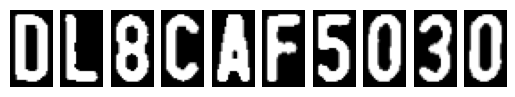

In [ ]:
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(char[i], cmap='gray')
    plt.axis('off')

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow.keras.backend as K
train_datagen = ImageDataGenerator(rescale=1./255, width_shift_range=0.1, height_shift_range=0.1)
path = "/content/Numberplate_dataset/data/data"

train_generator = train_datagen.flow_from_directory(
        path+'/train',  # this is the target directory
        target_size=(28,28),  # all images will be resized to 28x28
        batch_size=1,
        class_mode='sparse')

validation_generator = train_datagen.flow_from_directory(
        path+'/val',  # this is the target directory
        target_size=(28,28),  # all images will be resized to 28x28 batch_size=1,
        class_mode='sparse')



Found 864 images belonging to 36 classes.
Found 216 images belonging to 36 classes.


In [ ]:
# Metrics for checking the model performance while training
def f1score(y, y_pred):
  return f1_score(y, tf.math.argmax(y_pred, axis=1), average='micro')

def custom_f1score(y, y_pred):
  return tf.py_function(f1score, (y, y_pred), tf.double)

In [ ]:
from keras import optimizers
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Dense, Dropout
import tensorflow.keras.backend as K

K.clear_session()

model = Sequential()
model.add(Conv2D(16, (3,3), input_shape=(28, 28, 3), activation='relu', padding='same'))  # Assuming grayscale
model.add(Conv2D(32, (3,3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))  # Pooling earlier

model.add(Conv2D(64, (3,3), activation='relu', padding='same'))
model.add(Conv2D(128, (3,3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(GlobalAveragePooling2D())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.4))  # Move Dropout after Dense layer
model.add(Dense(36, activation='softmax'))


model.compile(loss='sparse_categorical_crossentropy',
              optimizer=optimizers.Adam(learning_rate=0.0001),
              metrics=['accuracy'])

model.summary()  # ✅ Always check the model structure


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 28, 16)          │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 28, 28, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 14, 14, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 14, 14, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 128)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 36)                  │           4,644 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 118,596 (463.27 KB)

 Trainable params: 118,596 (463.27 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
class StopTrainingCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('val_custom_f1score', 0) > 0.99:  # Default to 0 to prevent NoneType errors
            print(f"Stopping training at epoch {epoch+1} as val_custom_f1score reached {logs['val_custom_f1score']:.4f}")
            self.model.stop_training = True  # ✅ Correct: Stops training



In [ ]:
batch_size = 1
callbacks = [StopTrainingCallback()]
model.fit(
      train_generator,
      steps_per_epoch = train_generator.samples // batch_size,
      validation_data = validation_generator,
      epochs = 80, verbose=1, callbacks=callbacks)

Epoch 1/80
864/864 ━━━━━━━━━━━━━━━━━━━━ 12s 11ms/step - accuracy: 0.0239 - loss: 3.5863 - val_accuracy: 0.0741 - val_loss: 3.5800
Epoch 2/80
864/864 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.0403 - loss: 3.5799 - val_accuracy: 0.0556 - val_loss: 3.5203
Epoch 3/80
864/864 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.0451 - loss: 3.4661 - val_accuracy: 0.0694 - val_loss: 3.1404
Epoch 4/80
864/864 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.0909 - loss: 3.1688 - val_accuracy: 0.1019 - val_loss: 3.0466
Epoch 5/80
864/864 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.0825 - loss: 3.0632 - val_accuracy: 0.0926 - val_loss: 2.9536
Epoch 6/80
864/864 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.1004 - loss: 2.9857 - val_accuracy: 0.1343 - val_loss: 2.7630
Epoch 7/80
864/864 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.1098 - loss: 2.8670 - val_accuracy: 0.2037 - val_loss: 2.6764
Epoch 8/80
864/864 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.1715 - loss: 2.7956 - val_ac

In [19]:
# Predicting the output
def fix_dimension(img):
  new_img = np.zeros((28,28,3))
  for i in range(3):
    new_img[:,:,i] = img
  return new_img

def show_results():
    dic = {}
    characters = '0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZ'
    for i,c in enumerate(characters):
        dic[i] = c

    output = []
    for i,ch in enumerate(char): #iterating over the characters
        img_ = cv2.resize(ch, (28,28), interpolation=cv2.INTER_AREA)
        img = fix_dimension(img_)
        img = img.reshape(1,28,28,3) #preparing image for the model
        y_ = np.argmax(model.predict(img), axis=-1)[0]
        #y_ = model.predict_classes(img)[0] #predicting the class
        character = dic[y_] #
        output.append(character) #storing the result in a list

    plate_number = ''.join(output)

    return plate_number

print(show_results())


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 576ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step
DH8CAF5030


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━

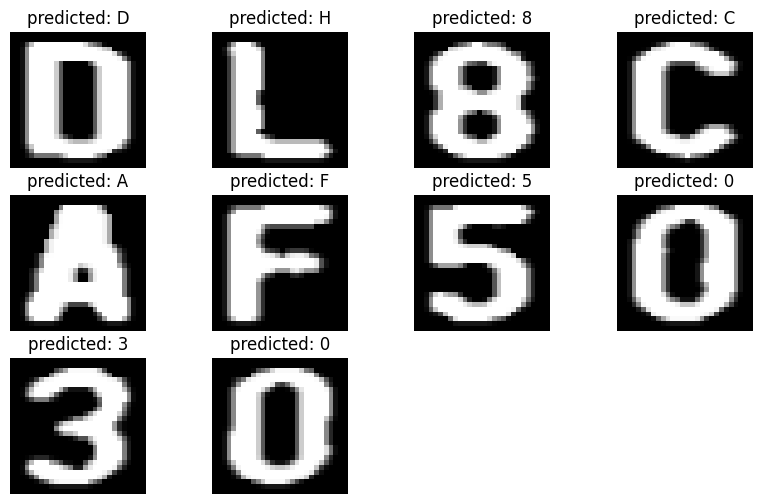

In [ ]:
# Segmented characters and their predicted value.
plt.figure(figsize=(10,6))
for i,ch in enumerate(char):
    img = cv2.resize(ch, (28,28), interpolation=cv2.INTER_AREA)
    plt.subplot(3,4,i+1)
    plt.imshow(img,cmap='gray')
    plt.title(f'predicted: {show_results()[i]}')
    plt.axis('off')
plt.show()

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 29 not upgraded.
✅ Image loaded successfully. Shape: (217, 325, 3)
✅ 1 plate(s) detected.


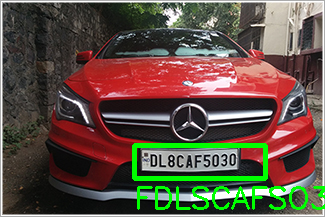

In [ ]:
# Install dependencies
!apt-get install -y tesseract-ocr
!pip install pytesseract
!pip install opencv-python-headless

# Import libraries
import cv2
import pytesseract
from google.colab.patches import cv2_imshow

# Load the image
image_path = "/content/Numberplate_dataset/car.jpg"
img = cv2.imread(image_path)

if img is None:
    print("❌ Error: Image not found!")
    exit()
else:
    print("✅ Image loaded successfully. Shape:", img.shape)

# Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Load number plate classifier
cascade_path = "/content/Numberplate_dataset/indian_license_plate.xml"
plate_cascade = cv2.CascadeClassifier(cascade_path)

if plate_cascade.empty():
    print("❌ Error: Cascade file not found or incorrect path!")
    exit()

# Detect license plates
plates = plate_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

if len(plates) == 0:
    print("❌ No plate detected!")
else:
    print(f"✅ {len(plates)} plate(s) detected.")

    for (x, y, w, h) in plates:
        # Draw rectangle around detected plate
        cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 3)

        # Extract license plate region
        plate_roi = gray[y:y+h, x:x+w]

        # Apply thresholding to enhance OCR performance
        plate_roi = cv2.threshold(plate_roi, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

        # Define Tesseract OCR configuration
        custom_config = r'--oem 3 --psm 7 -c tessedit_char_whitelist=ABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789'

        # OCR on extracted plate
        plate_text = pytesseract.image_to_string(plate_roi, config=custom_config).strip()

        # Remove unwanted characters
        plate_text = plate_text.replace("\n", "").replace("?", "")

        # Display recognized plate text on the image
        cv2.putText(img, plate_text, (x, y + h + 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

# Show the final result
cv2_imshow(img)


In [ ]:
# Applying Data augmentation and running the model

import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# ✅ 1. DATA AUGMENTATION
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

# ✅ 2. LOAD DATASET
dataset_path = "/content/Numberplate_dataset/data/data"  # Update this path

train_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(128, 128),
    batch_size=32,
    class_mode='sparse',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(128, 128),
    batch_size=32,
    class_mode='sparse',
    subset='validation'
)

# ✅ 3. LOAD PRETRAINED MODEL (MobileNetV2)
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(128, 128, 3))
base_model.trainable = False  # Freeze base layers

# ✅ 4. BUILD CUSTOM CLASSIFIER
x = base_model.output
x = Flatten()(x)
x = Dense(512, activation='relu')(x)  # ✅ Correct function call
x = Dropout(0.5)(x)  # ✅ Dropout correctly placed
x = Dense(36, activation='softmax')(x)  # ✅ Final output layer


model = Model(inputs=base_model.input, outputs=x)

# ✅ 5. COMPILE MODEL
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# ✅ 6. CALLBACKS (Early Stopping & Learning Rate Scheduler)
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-7)

# ✅ 7. TRAIN MODEL
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=50,
    callbacks=[early_stopping, lr_scheduler]
)

# ✅ 8. SAVE MODEL
model.save("license_plate_model.h5")

# ✅ 9. EVALUATE MODEL
loss, accuracy = model.evaluate(val_generator)
print(f"Validation Accuracy: {accuracy:.4f}")


Found 865 images belonging to 2 classes.
Found 215 images belonging to 2 classes.
Epoch 1/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 29s 855ms/step - accuracy: 0.3084 - loss: 3.6765 - val_accuracy: 0.7953 - val_loss: 0.7501 - learning_rate: 1.0000e-05
Epoch 2/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 22s 774ms/step - accuracy: 0.7486 - loss: 0.8659 - val_accuracy: 0.8093 - val_loss: 0.5359 - learning_rate: 1.0000e-05
Epoch 3/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 23s 813ms/step - accuracy: 0.7390 - loss: 0.7573 - val_accuracy: 0.7767 - val_loss: 0.5047 - learning_rate: 1.0000e-05
Epoch 4/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 20s 722ms/step - accuracy: 0.7279 - loss: 0.7076 - val_accuracy: 0.7953 - val_loss: 0.4815 - learning_rate: 1.0000e-05
Epoch 5/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 22s 774ms/step - accuracy: 0.7347 - loss: 0.6583 - val_accuracy: 0.8140 - val_loss: 0.5562 - learning_rate: 1.0000e-05
Epoch 6/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 20s 717ms/step - accuracy: 0.7647 - loss: 0.6308 - val_accuracy: 0.7860 - val_loss: 0.4754 - le

7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 390ms/step - accuracy: 0.7964 - loss: 0.4822
Validation Accuracy: 0.7953


In [ ]:
img_height, img_width = 128, 128
batch_size = 32

def predict_license_plate(image_path):
    img = cv2.imread(image_path)
    img = cv2.resize(img, (img_height, img_width))
    img = np.expand_dims(img, axis=0) / 255.0
    prediction = model.predict(img)
    predicted_class = np.argmax(prediction, axis=1)
    return predicted_class

# Example Usage
image_path = '/content/CAR2.jpg'
predicted_plate = predict_license_plate(image_path)
print(f'Predicted Plate: {predicted_plate}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
Predicted Plate: [0]


Initially the dataset has overfitting issue and later on, both train and tets accuracy improved and loss reduced, but fails to predict the correct number code.
